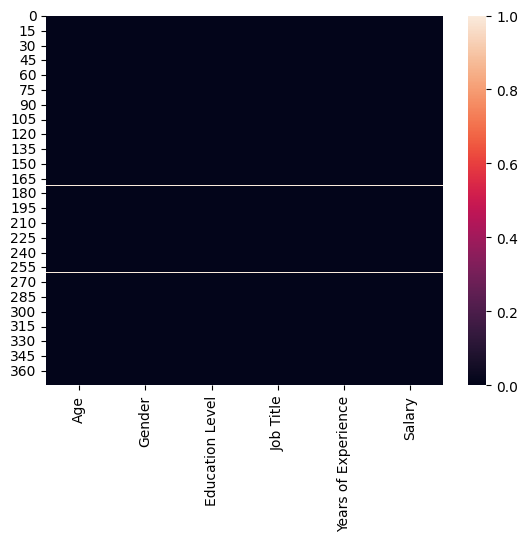

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  375 non-null    int64 
 1   Gender               375 non-null    object
 2   Education Level      375 non-null    object
 3   Job Title            375 non-null    object
 4   Years of Experience  375 non-null    int

C:\Users\praha\AppData\Local\Temp\ipykernel_13096\1418249559.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[i].fillna(dataset[i].mean(),inplace = True)
C:\Users\praha\AppData\Local\Temp\ipykernel_13096\1418249559.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

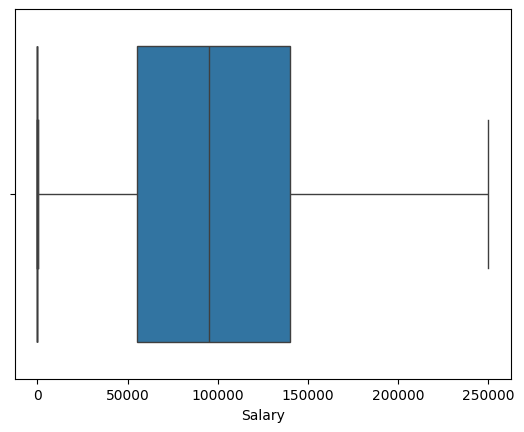

MSE: 148137246.89734277
MAE: 9365.356318590428
R2 Score: 0.9330343983185884


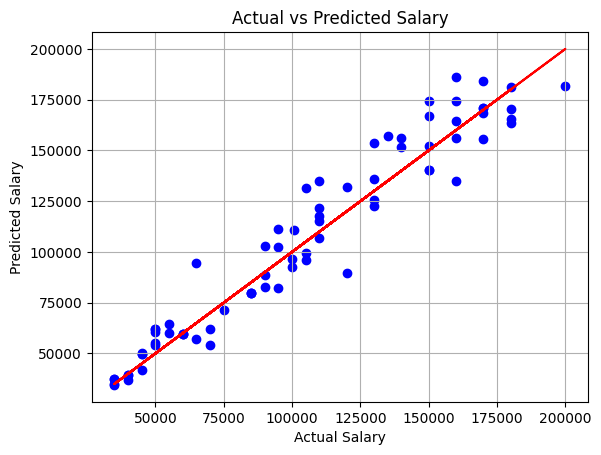

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

dataset=pd.read_csv(r"C:\Users\praha\OneDrive\Desktop\Salary_Predict\Salary Data.csv")
dataset.head()

sns.heatmap(dataset.isnull())
plt.show()

#Now finding the Missing value
dataset.info()
dataset.shape
dataset.isnull().sum()
(dataset.isnull().sum()/dataset.shape[0])*100
(dataset.isnull().sum().sum()/dataset.shape[0])*100

for i in dataset.select_dtypes(include=["float64"]).isnull():
    dataset[i].fillna(dataset[i].mean(),inplace = True)

dataset.isnull().sum()

for i in dataset.select_dtypes(include="object").isnull():
    dataset[i].fillna(dataset[i].mode()[0],inplace=True)

dataset.isnull().sum()

# Now We change the Datatype 
for i in dataset.select_dtypes(include=["float64"]).columns:
    dataset[i] = dataset[i].astype("int64")

dataset.info()

# Now find Treate the Outliers
sns.boxplot(x="Salary",data=dataset)
sns.boxplot(x="Age",data=dataset)
sns.boxplot(x="Years of Experience",data=dataset)
plt.show()

#Now we Encode our dataset
en_data=dataset[["Gender"]]

en_data_dum=pd.get_dummies(en_data)
en_data_dum.head()

ohe=OneHotEncoder()
ar=ohe.fit_transform(en_data).toarray()
dataset_new=pd.DataFrame(ar,columns=["Gender_Female","Gender_Male"])
dataset_new.head()
#NOw Drop one Column

ohe=OneHotEncoder(drop="first")
ar=ohe.fit_transform(en_data).toarray()
dataset_new=pd.DataFrame(ar,columns=["Gender_Male"])
dataset_new.head()

# Now add in Original dataset
# Drop the 'Gender' column from the original dataset
dataset.drop(columns=["Gender"], inplace=True)
dataset = pd.concat([dataset, dataset_new], axis=1)
dataset.head()

#Now again Encode our Education Level
dataset["Education Level"].unique()

or_data=[["PhD","Master's","Bachelor's"]]
oe=OrdinalEncoder(categories=or_data)
dataset["Education Level"]=oe.fit_transform(dataset[["Education Level"]])
dataset.head()

#Now again Encode our Job Title
dataset["Job Title"].unique()

#Best Approach for Your Salary Prediction:
#Job Title Grouping + Ordinal Encoding (Recommended)
#Since there are too many titles, group them into categories (e.g., Entry, Mid, Senior, Executive) and then use Ordinal Encoding.

def job_title_group(title):
    title = title.lower()  # Convert to lowercase for consistency
    if any(word in title for word in ['junior', 'assistant', 'entry']):
        return 'Entry-Level'
    elif any(word in title for word in ['manager', 'specialist', 'coordinator', 
                                        'supervisor', 'analyst', 'associate']):
        return 'Mid-Level'
    elif any(word in title for word in ['senior', 'director', 'principal', 'lead']):
        return 'Senior-Level'
    elif any(word in title for word in ['vp', 'chief', 'ceo', 'head']):
        return 'Executive-Level'
    else:
        return 'Mid-Level'  # Default level for unknown titles

# Apply the function
dataset['Job_Level'] = dataset['Job Title'].apply(job_title_group)


# Ordinal Encoding for Job Level
job_order = [["Entry-Level", "Mid-Level", "Senior-Level", "Executive-Level"]]
oe_job = OrdinalEncoder(categories=job_order)
dataset["Job_Level"] = oe_job.fit_transform(dataset[["Job_Level"]])

dataset.head()

# Now drop the Job title
dataset.drop(columns=["Job Title"],inplace=True)
dataset.head()

x=dataset[["Age","Education Level","Years of Experience","Gender_Male","Job_Level"]]
y=dataset["Salary"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=61)

lr=LinearRegression()
lr.fit(x_train,y_train)

lr.score(x_test,y_test)*100

y_pred = lr.predict(x_test)
dataset_com= pd.DataFrame({"Original":y_test,"Pedict":y_pred})
dataset_com.head()


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R2 Score: {r2}")



plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, y_test, color='red')  # Ideal line
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.grid(True)
plt.show()






In [7]:
import joblib
joblib.dump(lr, r'C:\Users\praha\OneDrive\Desktop\Salary_Predict\Program_salary_Predict.joblib')


['C:\\Users\\praha\\OneDrive\\Desktop\\Salary_Predict\\Program_salary_Predict.joblib']

In [8]:
import joblib
model = joblib.load(r'C:\Users\praha\OneDrive\Desktop\Salary_Predict\Program_salary_Predict.joblib')


In [9]:
import os
print(os.listdir())


['.ipynb_checkpoints', 'Program_salary_Predict.joblib', 'Program_salary_Predict.py', 'Program_salary_Predict.py.ipynb', 'Salary Data.csv']


In [11]:
import joblib
import locale

# Set locale to Indian style for currency
locale.setlocale(locale.LC_ALL, 'en_IN.UTF-8')

# Load the trained model
model = joblib.load('Program_salary_Predict.joblib')

# Example: Predict salary for a new employee
new_employee = [[30, 4, 5, 1, 2]]  # Age, Education, Experience, Gender, Job Level
predicted_salary = model.predict(new_employee)[0]

# Display salary in ₹ format
formatted_salary = locale.currency(predicted_salary, grouping=True, symbol=True)
print(f"Predicted Salary: {formatted_salary}")

Predicted Salary: ₹ 59,958.74


C:\Users\praha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.4.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\praha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
